In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [49]:
import matplotlib

In [50]:
font = {"size": 10, "weight": "bold"}
matplotlib.rc("font", **font)

In [3]:
dfs = []
for name in ['standard', 'noise', 'probend', 'probend_noise']:
    df = pd.read_csv('../data/%s_v3_processed.csv' % name, index_col=0
                           )
    df = df[["Normalized_Rank", "Name"]]
    df['type'] = name
    dfs.append(df)

/anaconda3/envs/axlml/lib/python3.5/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
df = pd.concat(dfs)

In [5]:
df.reset_index(inplace=True)

In [6]:
top_names = list(df.groupby(['Name']).median()['Normalized_Rank'].round(5).sort_values()[:15].index)

In [7]:
top_names.reverse()

In [31]:
remove_outliers = False

In [45]:
def get_distribution_without_outliers(distribution, percentage=0.2):
    distribution.sort()
    size_of_ditribution = len(distribution)
    outliers = int((size_of_ditribution * (percentage)) / 2) 
    
    return distribution[outliers:-outliers]

In [46]:
datas, violins, means = [], [], []
for i, tournament in enumerate(['standard', 'noise', 'probend', 'probend_noise']):

    data, violin_data = [], []
    for name in top_names:
        distribution = df[(df['type'] == tournament) & (df['Name'] == name)]['Normalized_Rank'].values
        
        data.append(distribution)
        
        if True:
            distribution = get_distribution_without_outliers(distribution)
        violin_data.append(distribution)

    mean = [np.mean(dt) for dt in data]
    
    datas.append(data), violins.append(violin_data), means.append(mean)

In [57]:
tournament_types = ['standard', 'noisy', 'probabilistic ending', 'noisy probabilistic ending']

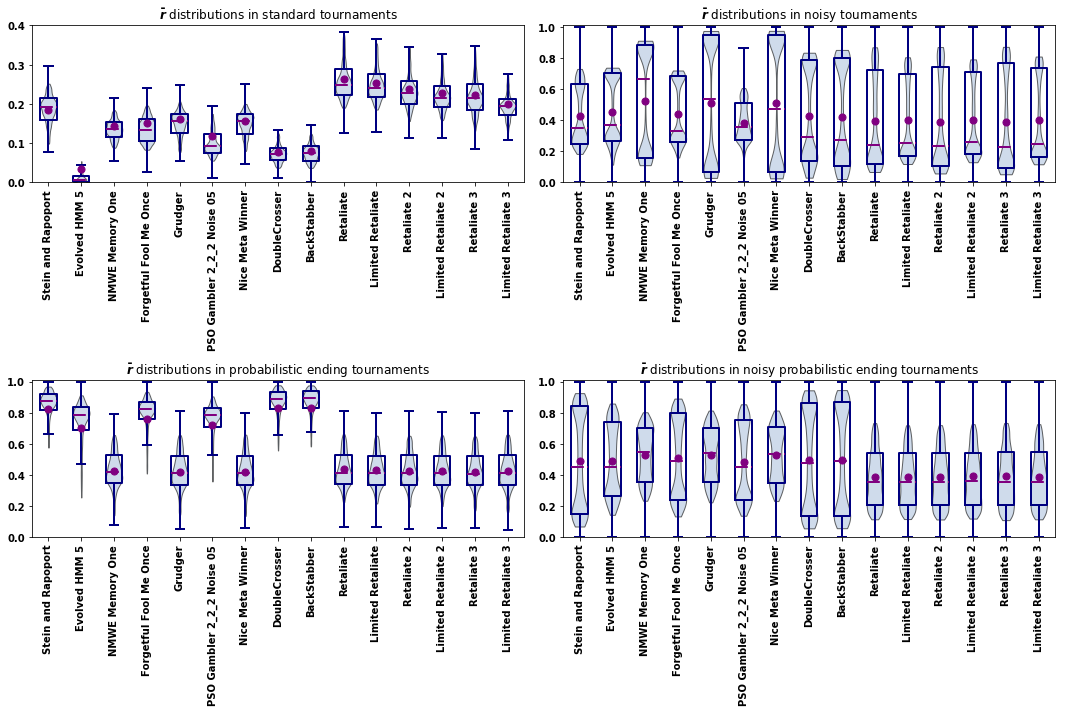

In [59]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
for i, ylim_up in enumerate([0.4, 1.01, 1.01, 1.01]):

    index = (int(i / 2), i % 2)
    parts = axes[index].violinplot(violins[i], showextrema=False,
                                   showmeans=False);

    boxes = axes[index].boxplot(datas[i], showfliers=False)
    axes[index].scatter(range(1, len(means[i]) + 1), means[i], marker='o', color='purple', zorder=3, s=50)

    for pc in parts['bodies']:
        pc.set_facecolor('lightsteelblue')
        pc.set_edgecolor('black')
        pc.set_alpha(.60)

    for bp in boxes['medians']:
        bp.set_color('purple')
        bp.set_linewidth(2)
        bp.set_linestyle('-.')
    for bp in boxes['caps']:
        bp.set_color('navy')
        bp.set_linewidth(2)
    for bp in boxes['whiskers']:
        bp.set_color('navy')
        bp.set_linewidth(2)
    for bp in boxes['boxes']:
        bp.set_color('navy')
        bp.set_linewidth(2)

    axes[index].set_title(r'$\bar{r}$ distributions in %s tournaments' % tournament_types[i])
    axes[index].set_ylim([0, ylim_up]);
    axes[index].set_xticklabels(list(top_names), rotation=90);
fig.tight_layout() 

fig.savefig('../images/performance.pdf',
            bbox_inches='tight')